# Assignment 2

# Description
### What is the general type of the data?

* The data obtained from the API is in JSON format. They are hierarchical data.
* We stored data from 2017 to 2019 using CSV files. The file size is 26.6M, 25.2M and 23.5M respectively.

### How large and complex is it？

* The data set has 4257 lines for 2019, 3985 lines for 2018, 3795 lines for 2017. Each line represents a performance at the Edinburgh Finge Festival in a particular year.
* The data set also has 34 columns and each column shows an aspect of a performance (e.g. title, warnings, performers number).

### What fields and data types are present？

* Most columns have meaningful values, most of which are strings, Boolean and number.
* Some columns contain null values. 
* Some columns contain list and dictionary.

### Links between this data and other data.

* API provides data on all activities of Edinburgh Art Festival from 2012 to 2020, such as Edinburgh International Feastival, Roya Edinburgh Military Tatto.
* The analysis of Group25 only focuses on data from the Edinburgh Finge Festival between 2017 and 2019.

### Summary statistics about the data.

* The project contains 3 csv files, each of which collects data from the Edinburgh Finge Festival from 2017 to 2019.
* For each csv file, each line represents a performance at Edinburgh Finge Festival in one year, while each column shows an aspect of a performance. 
* We can understand the program from different perspectives, including performance (e.g. name, genre, description), artist information (e.g. name, artist type, country), venue information (e.g. address, disabled description), and sales information (e.g. booking over phone/card/web).

### How does the data relate to the questions that the data owner has discussed with you?

* The project aims to analyze the factors behind the success and marginalization of cultural workers.
* Each group members were allocated to analyze specific 2 or 3 columns of data to explore correlations of variables after the group meeting. I was allocated with the ‘artist_type’ column (the company where the artist works) and the ‘warning’ column (warning labels of the performance).
* In my own analysis, the first focus is the relationship between the artist type and their success. The second focus is that when a performance’s warning involved certain content, whether it became less popular.


# Setup

First, load the data, from the supplied data file
* In columns disabled, update_times, discounts, performance_space, categories, and venue, the data in each row has changed into dictionary datatype.
- In column performances, the data in each row has changed into list datatype, and in each list, each item is in dictionary datatype.

In [2]:
import sys 
sys.path.append('d:/anaconda/lib/site-packages')
import pandas as pd
import csv
import json

fringe_2019 = pd.read_csv('fringe_2019.csv')
fringe_2018 = pd.read_csv('fringe_2018.csv')
fringe_2017 = pd.read_csv('fringe_2017.csv')

# Exploration 1
Exploration1 is about the relationship between the artist type and their success.

# 1.1 Exploratory visualisation

Analyze the number of different artist types in 3 separate years, and get the connection between different artist types and performance opportunities.

#### First, count the total number of different artist types in 3 separate years.

In [3]:
fringe_2019['artist_type']
fringe_2019_cnt = {}  

for value in fringe_2019['artist_type'].values:
    fringe_2019_cnt[value] = fringe_2019_cnt.get(value, 0) + 1

df_2019=pd.DataFrame.from_dict(fringe_2019_cnt,orient='index',columns=['2019'])
df_2019=df_2019.reset_index().rename(columns={'index':'artist_type'})
df_2019

,artist_type,2019
0,Amateur Company,466
1,Semi-professional company,707
2,Professional company,2727
3,Student/Youth company,357


In [4]:
fringe_2018['artist_type']
fringe_2018_cnt = {}  

for value in fringe_2018['artist_type'].values:
    fringe_2018_cnt[value] = fringe_2018_cnt.get(value, 0) + 1

df_2018=pd.DataFrame.from_dict(fringe_2018_cnt,orient='index',columns=['2018'])
df_2018=df_2018.reset_index().rename(columns={'index':'artist_type'})
df_2018

,artist_type,2018
0,Semi-professional company,680
1,Student/Youth company,381
2,Professional company,2491
3,Amateur Company,433


In [5]:
fringe_2017['artist_type']
fringe_2017_cnt = {}  

for value in fringe_2017['artist_type'].values:
    fringe_2017_cnt[value] = fringe_2017_cnt.get(value, 0) + 1

df_2017=pd.DataFrame.from_dict(fringe_2017_cnt,orient='index',columns=['2017'])
df_2017=df_2017.reset_index().rename(columns={'index':'artist_type'})
df_2017

,artist_type,2017
0,Semi-professional company,576
1,Professional company,2497
2,Student/Youth company,350
3,Amateur Company,372


#### Second, merge all the dataframes.

In [6]:
a=df_2019.merge(df_2018,on=['artist_type'])
df_merge=a.merge(df_2017,on=['artist_type'])
print(df_merge)

                 artist_type  2019  2018  2017
0            Amateur Company   466   433   372
1  Semi-professional company   707   680   576
2       Professional company  2727  2491  2497
3      Student/Youth company   357   381   350


#### Third, plot them on the same plot.

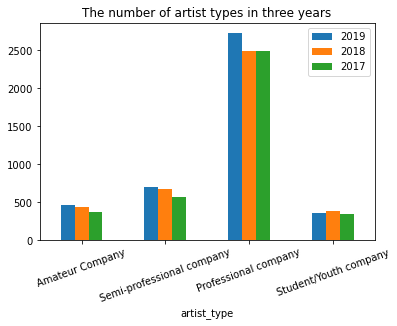

In [26]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

bar_merge = df_merge.plot.bar(x='artist_type', y=['2019','2018','2017'], rot=20)
plt.title('The number of artist types in three years')
plt.show()

## Explanation

* The majority of the shows are performed by artists from professional companies, followed by artists from semi-professional companies, and then by amateur companies and student/youth companies. This trend has remained basically unchanged in these 3 years.
* It shows that the more professional the company, the more likely it is for artists to perform, leading to their success.

# 1.2 Exploratory visualisation 

Some artists perform more than once at Edinburgh Finge Festival. Analyze the types of artists who have performed several times. 

#### First, find the artists who perform more than once in 3 separate years.

In [7]:
# The number of artists who perform more than once in 2019

import pandas as pd 
data_2019=fringe_2019[['artist','artist_type']]
frame_2019=pd.DataFrame(data_2019)  

a = frame_2019.drop_duplicates(subset=['artist'],keep='first')
b = frame_2019.drop_duplicates(subset=['artist'],keep=False)
c = a.append(b).drop_duplicates(subset=['artist'],keep=False) 
several_2019 = frame_2019.loc[frame_2019['artist'].isin(c['artist'])]

print(several_2019)

                                 artist                artist_type
7                   Elsa Jean McTaggart       Professional company
10                           Stage D'Or       Professional company
13                       Raiser Theatre      Student/Youth company
15                         Circus Sonas       Professional company
22                           Raul Kohli       Professional company
...                                 ...                        ...
4248  Edinburgh Festival Fringe Society       Professional company
4249                      Rabbit Rabbit       Professional company
4254                    BoxedIn Theatre  Semi-professional company
4255                       Cobble Tales       Professional company
4256                       Jonny Pelham       Professional company

[1340 rows x 2 columns]


In [8]:
# The number of artists who perform more than once in 2018

import pandas as pd 
data_2018=fringe_2018[['artist','artist_type']]
frame_2018=pd.DataFrame(data_2018)  

a = frame_2018.drop_duplicates(subset=['artist'],keep='first')
b = frame_2018.drop_duplicates(subset=['artist'],keep=False)
c = a.append(b).drop_duplicates(subset=['artist'],keep=False) 
several_2018 = frame_2018.loc[frame_2018['artist'].isin(c['artist'])]

print(several_2018)

                                                 artist  \
0                               Kingdom Theatre Company   
1                               Kingdom Theatre Company   
3       Gilded Balloon and Dead Sheep Comedy present...   
9                           Searchlight Theatre Company   
10    Bound & Gagged Comedy in association with Glor...   
...                                                 ...   
3963                                          Stamptown   
3974                     BBC Arts and Avalon Promotions   
3978                                      Eggbox Comedy   
3981                                     ChrisGrady.Org   
3982                                 Civil Disobedience   

                    artist_type  
0     Semi-professional company  
1     Semi-professional company  
3          Professional company  
9          Professional company  
10         Professional company  
...                         ...  
3963       Professional company  
3974       Professi

In [9]:
# The number of artists who perform more than once in 2017

import pandas as pd 
data_2017=fringe_2017[['artist','artist_type']]
frame_2017=pd.DataFrame(data_2017)  

a = frame_2017.drop_duplicates(subset=['artist'],keep='first')
b = frame_2017.drop_duplicates(subset=['artist'],keep=False)
c = a.append(b).drop_duplicates(subset=['artist'],keep=False) 
several_2017 = frame_2017.loc[frame_2017['artist'].isin(c['artist'])]

print(several_2017)

                                                 artist  \
2                               Not Cricket Productions   
7     Bound & Gagged Comedy in association with UTC ...   
10    Paines Plough, Theatr Clwyd and Orange Tree Th...   
12                                                  IDP   
15                           Sharon Burgess Productions   
...                                                 ...   
3777                                  PBH's Free Fringe   
3785                                 Wrong Tree Theatre   
3787                                      Metta Theatre   
3791                    Magnificent Bastard Productions   
3794  Baxter Theatre Centre at the University of Cap...   

                    artist_type  
2     Semi-professional company  
7          Professional company  
10         Professional company  
12        Student/Youth company  
15         Professional company  
...                         ...  
3777  Semi-professional company  
3785      Student/Y

#### Second, find out the type of artist who performed more than once and count their number.

In [10]:
# Analyze different types of artists in 2019

several_2019_cnt = {}  

for value in several_2019['artist_type'].values:
    several_2019_cnt[value] = several_2019_cnt.get(value, 0) + 1

df_several_2019=pd.DataFrame.from_dict(several_2019_cnt,orient='index',columns=['2019'])
df_several_2019=df_several_2019.reset_index().rename(columns={'index':'artist_type'})
df_several_2019

,artist_type,2019
0,Professional company,1013
1,Student/Youth company,106
2,Amateur Company,86
3,Semi-professional company,135


In [11]:
# Analyze different types of artists in 2018

several_2018_cnt = {}  

for value in several_2018['artist_type'].values:
    several_2018_cnt[value] = several_2019_cnt.get(value, 0) + 1

df_several_2018=pd.DataFrame.from_dict(several_2018_cnt,orient='index',columns=['2018'])
df_several_2018=df_several_2018.reset_index().rename(columns={'index':'artist_type'})
df_several_2018

,artist_type,2018
0,Semi-professional company,136
1,Professional company,1014
2,Amateur Company,87
3,Student/Youth company,107


In [12]:
# Analyze different types of artists in 2017

several_2017_cnt = {}  

for value in several_2017['artist_type'].values:
    several_2017_cnt[value] = several_2017_cnt.get(value, 0) + 1

df_several_2017=pd.DataFrame.from_dict(several_2017_cnt,orient='index',columns=['2017'])
df_several_2017=df_several_2017.reset_index().rename(columns={'index':'artist_type'})
df_several_2017

,artist_type,2017
0,Semi-professional company,100
1,Professional company,876
2,Student/Youth company,106
3,Amateur Company,64


#### Third, merge all the dataframes.

In [13]:
a =df_several_2019.merge(df_several_2018,on=['artist_type'])
df_merge=a.merge(df_several_2017,on=['artist_type'])
print(df_merge)

                 artist_type  2019  2018  2017
0       Professional company  1013  1014   876
1      Student/Youth company   106   107   106
2            Amateur Company    86    87    64
3  Semi-professional company   135   136   100


#### Fourth, plot them on the same plot.

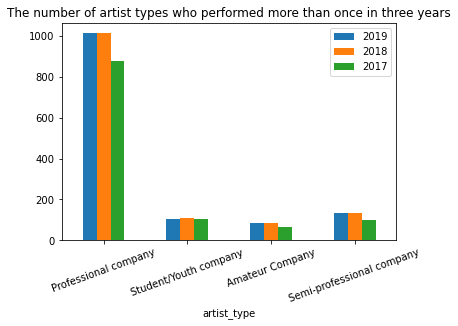

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

bar_merge = df_merge.plot.bar(x='artist_type', y=['2019','2018','2017'], rot=20)
plt.title('The number of artist types who performed more than once in three years')
plt.show()

## Explanation

* The first highest value comes from professional companies. There is a big gap between the values of professional companies and the other three types.
* The more professionally trained the artist, the more successful the performance and the greater the possibility of performing several times.

# 1.3 Exploratory visualisation 

For artists who have performed several times, the number of times they perform varies. For example, Some artists performed twice, and some artists performed more than a dozen times.

I want to explore the relationship between the number of performance times and their artist types.

#### First, find out artists who performed more than once, their artist types, and the number of their performances.

In [67]:
# Let's start with 2019.

import pandas as pd 
data_2019=fringe_2019[['artist']]
frame_2019=pd.DataFrame(data_2019)  

a = frame_2019.drop_duplicates(subset=['artist'],keep='first')
b = frame_2019.drop_duplicates(subset=['artist'],keep=False)
c = a.append(b).drop_duplicates(subset=['artist'],keep=False) 
several_2019 = frame_2019.loc[frame_2019['artist'].isin(c['artist'])]

several_2019_count=several_2019['artist'].value_counts().rename_axis('artist').reset_index(name='counts')
artist_type=pd.DataFrame(fringe_2019['artist_type'])

df_several_2019=pd.concat([several_2019_count,artist_type], axis=1).reindex(several_2019_count.index)
df_several_2019['year'] = '2019'

print('\nNumber of performances and artist types for those who performed more than once in 2019')
print(df_several_2019)

# 2018

import pandas as pd 
data_2018=fringe_2018[['artist']]
frame_2018=pd.DataFrame(data_2018)  

a = frame_2018.drop_duplicates(subset=['artist'],keep='first')
b = frame_2018.drop_duplicates(subset=['artist'],keep=False)
c = a.append(b).drop_duplicates(subset=['artist'],keep=False) 
several_2018 = frame_2018.loc[frame_2018['artist'].isin(c['artist'])]

several_2018_count=several_2018['artist'].value_counts().rename_axis('artist').reset_index(name='counts')
artist_type=pd.DataFrame(fringe_2018['artist_type'])

df_several_2018=pd.concat([several_2018_count,artist_type], axis=1).reindex(several_2018_count.index)
df_several_2018['year'] = '2018'
print('\nNumber of performances and artist types for those who performed more than once in 2018')
print(df_several_2018)

# 2017

import pandas as pd 
data_2017=fringe_2017[['artist']]
frame_2017=pd.DataFrame(data_2017)  

a = frame_2017.drop_duplicates(subset=['artist'],keep='first')
b = frame_2017.drop_duplicates(subset=['artist'],keep=False)
c = a.append(b).drop_duplicates(subset=['artist'],keep=False) 
several_2017 = frame_2017.loc[frame_2017['artist'].isin(c['artist'])]

several_2017_count=several_2017['artist'].value_counts().rename_axis('artist').reset_index(name='counts')
artist_type=pd.DataFrame(fringe_2017['artist_type'])

df_several_2017=pd.concat([several_2017_count,artist_type], axis=1).reindex(several_2017_count.index)
df_several_2017['year'] = '2017'
print('\nNumber of performances and artist types for those who performed more than once in 2017')
print(df_several_2017)


Number of performances and artist types for those who performed more than once in 2019
                                          artist  counts  \
0              Fair Pley / The Stand Comedy Club    45.0   
1          American High School Theatre Festival    32.0   
2                              Avalon Promotions    23.0   
3              Edinburgh Festival Fringe Society    22.0   
4                       Off The Kerb Productions    18.0   
..                                           ...     ...   
433                                  Lucy Thomas     2.0   
434  Emma Blackman Productions and Emily Jenkins     2.0   
435                                Daniel Downie     2.0   
436                       Ron Davis' SymphRONica     2.0   
437                                Entertainers      2.0   

                   artist_type  year  
0              Amateur Company  2019  
1    Semi-professional company  2019  
2              Amateur Company  2019  
3         Professional company  201

#### Second, violinplot to data density and overall distribution of data.

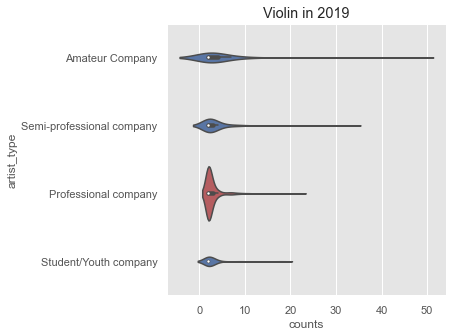

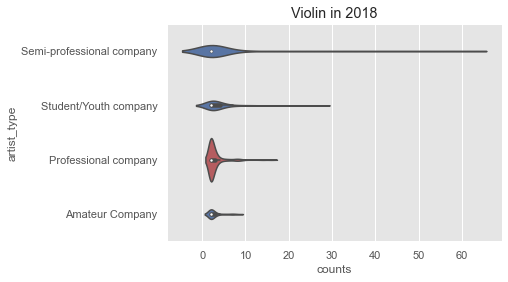

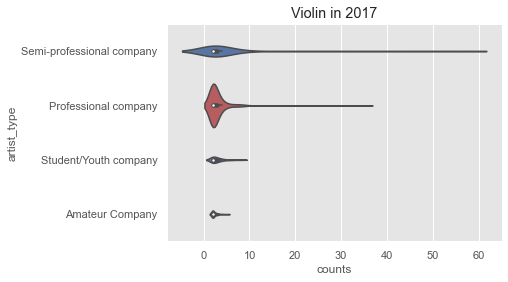

In [160]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5,5))

# Sets the color for a specific group
special = {artist_type: "r" if artist_type == "Professional company" else "b" for artist_type in df_several_2019.artist_type.unique()}
sns.violinplot(x='counts', y='artist_type', data=df_several_2019,scale='count',palette=special)  
plt.title('Violin in 2019')
plt.show()

special = {artist_type: "r" if artist_type == "Professional company" else "b" for artist_type in df_several_2018.artist_type.unique()}
sns.violinplot(x='counts', y='artist_type', data=df_several_2018,scale='count',palette=special)  
plt.title('Violin in 2018')
plt.show()

special = {artist_type: "r" if artist_type == "Professional company" else "b" for artist_type in df_several_2017.artist_type.unique()}
sns.violinplot(x='counts', y='artist_type', data=df_several_2017,scale='count',palette=special)  
plt.title('Violin in 2017')
plt.show()

* The width of the violinplot shows the density of the dataframe in three separate years. As shown in red, most artists who perform multiple times come from professional companies. The second most come from semi-professional companies.
* The length of the violinplot shows the dispersion of the data and outliers. In these three years, the artists with the most performances are not from professional companies, but from amateur or semi-professional companies, more than 50 times.
* Both amateur companies and student/youth companies show an upward trend in the number of performances and the number of artists who can performed more than once at the festival. Amateur companies sees a sharp increase, while student/youth companies grow steadily.
* Most artists perform less than 10 times.
* Violinplot is limited as it can only show data density and data concentration. In next step, I will use scatterplot to specifically explore the relationship between the number of performances and artist types.

#### Third, scatterplot to see the relationship between the number of performances and artist types.

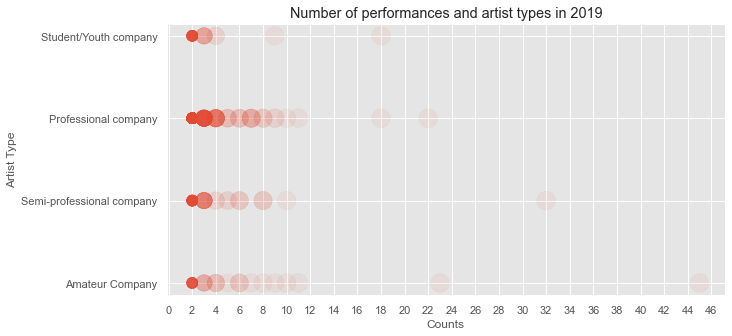

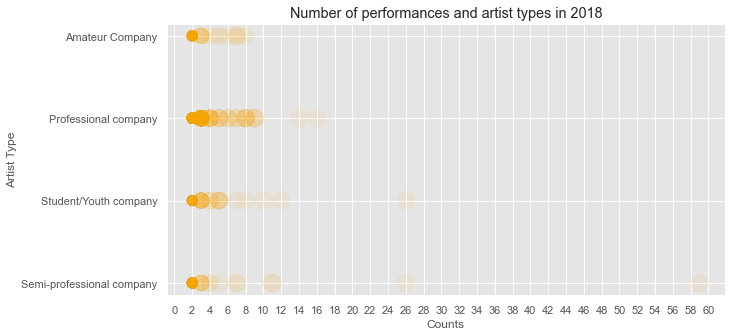

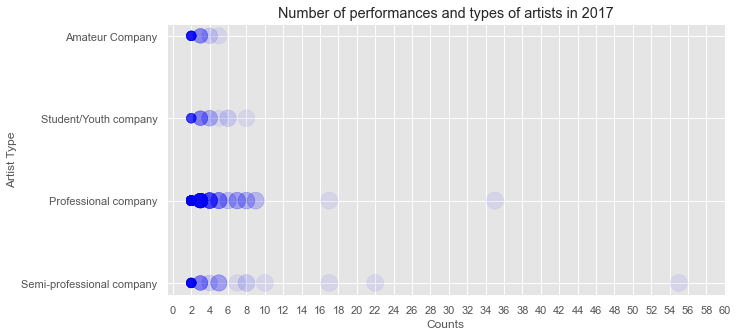

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# The distribution of clusters in 2019

# Each dot represents an artist.
# The x-axis represents the number of performances and the y-axis represents the artist type.
# The darker the dot, the more dots overlap at this point.

plt.figure(figsize=(10,5))

size=df_several_2019["counts"].rank()
n=0.8

Scatterplot2019=plt.scatter(df_several_2019["counts"],df_several_2019["artist_type"],s=size*n,alpha=0.07)
plt.xlabel('Counts')   
plt.ylabel('Artist Type') 
x = range(0,47,2)
plt.xticks(x)
plt.title('Number of performances and artist types in 2019')
plt.show()


# The distribution of clusters in 2018
plt.figure(figsize=(10,5))

size=df_several_2018["counts"].rank()
n=0.8

Scatterplot2018=plt.scatter(df_several_2018["counts"],df_several_2018["artist_type"],color='orange',s=size*n,alpha=0.07)
plt.xlabel('Counts')   
plt.ylabel('Artist Type') 
x = range(0,61,2)
plt.xticks(x)
plt.title('Number of performances and artist types in 2018')
plt.show()

# The distribution of clusters in 2017
plt.figure(figsize=(10,5))

size=df_several_2017["counts"].rank()
n=0.8

Scatterplot2017=plt.scatter(df_several_2017["counts"],df_several_2017["artist_type"],color='blue',s=size*n,alpha=0.07)
plt.xlabel('Counts')   
plt.ylabel('Artist Type') 
x = range(0,61,2)
plt.xticks(x)
plt.title('Number of performances and types of artists in 2017')
plt.show()

## Explanation

#### The color of dots
* The darker the dot, the more artists from the same type of company perform the same number of times.
* When the number of performances is 2, there is no big difference in the number of artists of the four types of companies.
* When the number of performances is 3, the color of the dot in the professional company is darker than that of the other three companies. It is also as dark as the color of the dot when the number of performances is 2.  
* It shows that professional companies have more possibilities to train artists who performe more than twice, leading to better performance and artist success.


# Exploration 2
Exploration 2 is about the relationship between performance warnings and artist success.

# 2.1 Exploratory visualisation

#### First, sort out the key words that appear in the warning column of the dataframe.

In [188]:
# Keywords in the warning column in 2019

# Clean data
# Some cells contain multiple keywords, separated by commas.
# Iterate through the cells, extract the keywords, and add them to the list.

A=fringe_2019['warnings'].values.tolist()
warnings_2019=[]

for a in A:
    C=a.split(',')
    for c in C:
        c=c.strip()
        c=c.replace('\n',',')
        D=c.split(',')
        for d in D:
            d=d.replace('.','')
            d=d.split(',')
            for value in d:
                warnings_2019.append(value)

# Count the number of keywords.
import pandas as pd
result=pd.value_counts(warnings_2019)
result=result.rename_axis('warnings_2019').reset_index(name='counts')

# Print the top ten warnings in 2019.
result2019=result[:11]
print(result2019)


# Keywords in the warning column in 2018
fringe_2018=fringe_2018.where(fringe_2018.notnull(),'None')
A=fringe_2018['warnings'].values.tolist()
warnings_2018=[]

for a in A:
    C=a.split(',')
    for c in C:
        c=c.strip()
        c=c.capitalize()
        c=c.replace('\n',',')
        D=c.split(',')
        for d in D:
            d=d.replace('.','')
            d=d.replace('gain priority','be given priority')
            d=d.replace('get priority','be given priority')
            d=d.replace('\r','')
            d=d.split(',')
            for value in d:
                warnings_2018.append(value)

import pandas as pd
result=pd.value_counts(warnings_2018)
result=result.rename_axis('warnings_2018').reset_index(name='counts')
result2018=result[:11]
print('\n')
print(result2018)


# Keywords in the warning column in 2017
fringe_2017=fringe_2017.where(fringe_2017.notnull(),'None')
A=fringe_2017['warnings'].values.tolist()
warnings_2017=[]

for a in A:
    C=a.split(',')
    for c in C:
        c=c.strip()
        c=c.capitalize()
        D=c.split(',')
        for d in D:
            d=d.replace('\r\n','')
            d=d.replace('late comers','latecomers')
            d=d.replace(' and','')
            d=d.replace('unreservedand','unreserved')
            d=d.replace('notbe','not be')
            d=d.replace('.','')
            d=d.split(',')
            for value in d:
                warnings_2017.append(value)
                
import pandas as pd
result=pd.value_counts(warnings_2017)
result=result.rename_axis('warnings_2017').reset_index(name='counts')
result2017=result[:11]
print('\n')
print(result2017)

                                        warnings_2019  counts
0                                                None    1954
1                            Strong Language/Swearing    1429
2                              Audience Participation     745
3                                               Other     435
4                         Contains Distressing Themes     415
5                           Scenes of a Sexual Nature     250
6                                  Scenes of Violence     171
7                                     Strobe Lighting     145
8                                              Nudity     116
9   All seating is unreserved and latecomers may n...      79
10                                   Involves Walking      77


                                        warnings_2018  counts
0                                                None    2544
1   Buy a ticket in advance to guarantee entry or ...     223
2   Those with fringe participant pass will be giv...     106
3     

#### Second, plot to see the top ten most used warnings in three years

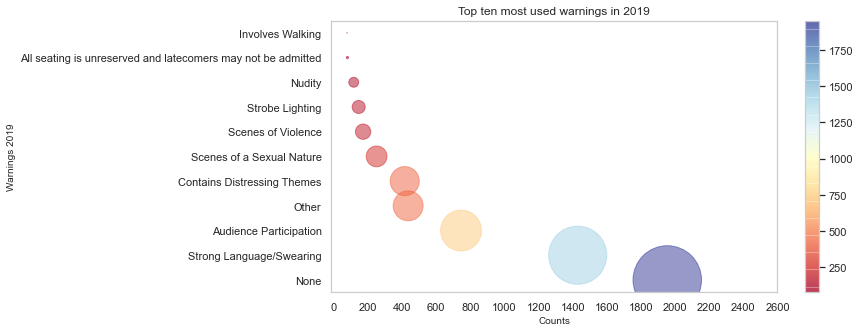

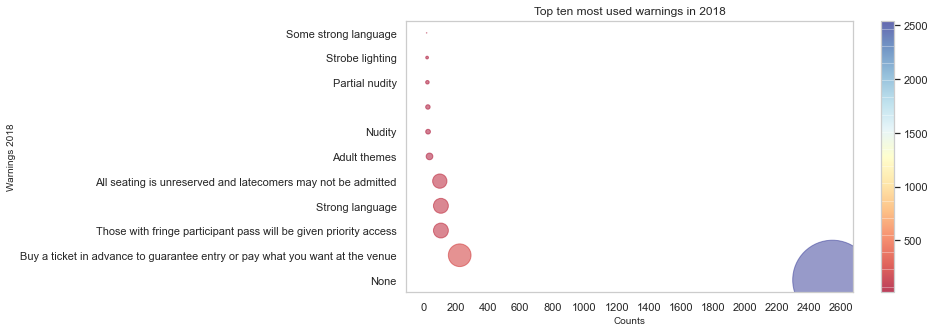

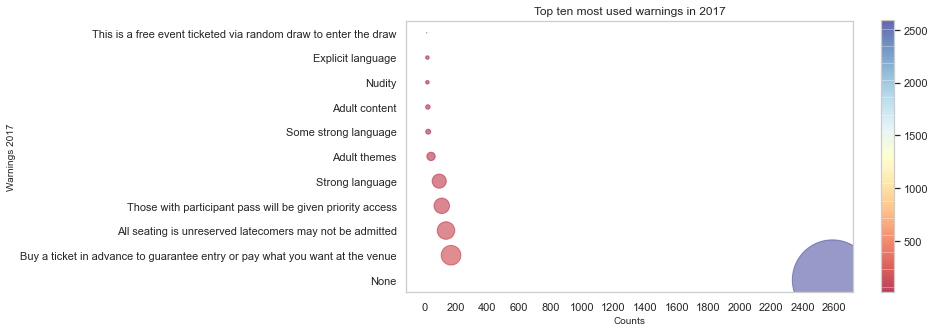

In [189]:
# The distribution of clusters in 2019
# The dot size indicates the number of performances. The more shows, the bigger the dot.

import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
%matplotlib inline


def DrawBubble(read_name):
    sns.set(style = "whitegrid")
    x = result2019["counts"]
    y = result2019["warnings_2019"]
    z = result2019["counts"]
    cm = plt.cm.get_cmap('RdYlBu')
    fig,ax = plt.subplots(figsize = (10,5))
    bubble = ax.scatter(x, y , s = (z - np.min(z) + 0.1) *2.5, c = z, cmap = cm, linewidth = 1, alpha = 0.5)
    ax.grid()
    fig.colorbar(bubble)
        
    ax.set_xlabel('Counts', fontsize = 10)
    ax.set_ylabel('Warnings 2019', fontsize = 10)
    x = range(0,2601,200)
    plt.xticks(x)
    plt.title('Top ten most used warnings in 2019')
    plt.show()
    
if __name__=='__main__':
    DrawBubble(result2019)
    

# The distribution of clusters in 2018
def DrawBubble(read_name):
    sns.set(style = "whitegrid")
    x = result2018["counts"]
    y = result2018["warnings_2018"]
    z = result2018["counts"]
    cm = plt.cm.get_cmap('RdYlBu')
    fig,ax = plt.subplots(figsize = (10,5))
    bubble = ax.scatter(x, y , s = (z - np.min(z) + 0.1) *2.5, c = z, cmap = cm, linewidth = 1, alpha = 0.5)
    ax.grid()
    fig.colorbar(bubble)
        
    ax.set_xlabel('Counts', fontsize = 10)
    ax.set_ylabel('Warnings 2018', fontsize = 10)
    x = range(0,2601,200)
    plt.xticks(x)
    plt.title('Top ten most used warnings in 2018')
    plt.show()
    
if __name__=='__main__':
    DrawBubble(result2018)
    
    
# The distribution of clusters in 2017
def DrawBubble(read_name):
    sns.set(style = "whitegrid")
    x = result2017["counts"]
    y = result2017["warnings_2017"]
    z = result2017["counts"]
    cm = plt.cm.get_cmap('RdYlBu')
    fig,ax = plt.subplots(figsize = (10,5))
    bubble = ax.scatter(x, y , s = (z - np.min(z) + 0.1) *2.5, c = z, cmap = cm, linewidth = 1, alpha = 0.5)
    ax.grid()
    fig.colorbar(bubble)
        
    ax.set_xlabel('Counts', fontsize = 10)
    ax.set_ylabel('Warnings 2017', fontsize = 10)
    x = range(0,2601,200)
    plt.xticks(x)
    plt.title('Top ten most used warnings in 2017')
    plt.show()
    
if __name__=='__main__':
    DrawBubble(result2017)
    

## Explanation

* Most of performances have no warnings and are labelled with 'None'.
* Many of the 2017 and 2018 warnings are about ticket sales, admission, and seating arrangements (e.g. 'All seating is unreserved latecomers may not be admitted.', 'Buy a ticket in advance to guarantee entry or pay what you want at the venue.', 'Those with participant pass will be given priority access.'). In contrast, the types and numbers of related warnings have decreased in 2019.
* Free tickets were offered in 2017, but not in 2018 and 2019. It shows that the producer promoted the box office through free tickets in the early days, but this method was no longer used in the follow-up, proving that artists' performances are becoming more and more popular at the Edinburgh Finge Festival.
* It is obvious that the 2019 performance warning was more specific than 2017 and 2018. 'Adult content' and 'Adult themes' were often used in performance warnings in 2017 and 2018, and they were replaced by more detailed keywords in 2019, such as ’Scenes of a Sexual Nature’ and ’Scenes of Violence’. ‘Strong language’ in 2017 and 2018 was also replaced with 'Strong language/Swearing' in 2019.
* The 2019 program emphasized user participation more than 2017 and 2018. In 2019, ‘Audience Participation’ is the third-ranked label, with more than 750, while 'Involves Walking' also entered the top ten list, with more than 70. 

# Reflections and Hypotheses

The project aims to analyze the factors behind the success and marginalization of cultural workers. I was allocated to explore the relationship between the artist type and their success with the ‘artist_type’ column and to explore keywords contained in warnings with the ‘warning’ column.

The first hypotheses is that the more professional the company, the more likely the artist is to perform at the Edinburgh Fringe Festival. As the bar chart shown in 1.1 Exploratory visualization, more than half of the artists who performed at the festival come from professional companies, followed by those from semi-professional companies. 

The second hypotheses is that the more professional the company, the more likely the artist is to perform multiple times at the Edinburgh Fringe Festival. As the bar chart shown in 1.2 Exploratory visualization, the majority of the artists who performed more than once come from professional companies, which is far from the other three companies. As the violin plot and scatter plot shown in 1.3 Exploratory visualization, most of artists who performed more than twice come from professional companies, confirming the second hypothesis. Importantly, in both amateur companies and student/youth companies, the number of artists performing more than once is on the rise.

What surprised me is that in these three years, the artists with the most performances came from amateur or semi-professional companies, more than 50 times, rather than professional companies. The reason cannot be seen from the data alone, so further studies would be needed.

The third hypotheses is that the performances that emphasized user participation are more popular, leading to the success of artists. As the scatter plot shown in 2.1 Exploratory visualisation, "Audience Participation" and "Involves Walking" appeared in many performances in 2019, compared to not appearing in the previous 2 years. 

The fourth hypotheses is that more descriptive and specific keywords can make programs more popular. The number of performance warnings in 2019 is higher than that of previous years. Key words in warnings are more specific, such as 'Scenes of a Sexual Nature' and 'Scenes of Violence' replacing 'Adult content'. 